# What is a Class-Based Model in PyTorch?
In PyTorch, neural networks are defined as classes that inherit from torch.nn.Module. This structure allows you to organize your model's layers and operations in a clear and reusable way. PyTorch’s nn.Module provides the building blocks for layers, loss functions, and other key components needed to build deep learning models.

Let’s start from the basics:

# Step 1: Define a Class that Inherits from nn.Module

Every PyTorch model is a class that inherits from torch.nn.Module. This is the base class for all neural networks in PyTorch, and it contains useful methods like saving and loading models.

In [1]:
import torch
import torch.nn as nn

class MySimpleModel(nn.Module):  # Inherit from nn.Module
    def __init__(self):
        super(MySimpleModel, self).__init__()  # Call the parent class (nn.Module) constructor

## Explanation:
MySimpleModel is the name of your class, which represents the neural network.

*   nn.Module is the base class provided by PyTorch for all models.
*   super(MySimpleModel, self).__init__() ensures that the initialization of nn.Module happens properly so that all the PyTorch machinery works.

# Step 2: Define the Layers in the __init__() Method
In the __init__() method, you define the layers of your neural network. PyTorch provides many types of layers, but the most common ones are fully connected layers (also known as linear layers), convolutional layers, and activation functions.

Here’s an example of a simple feedforward neural network:

In [2]:
class MySimpleModel(nn.Module):
    def __init__(self):
        super(MySimpleModel, self).__init__()

        # Define layers
        self.fc1 = nn.Linear(28 * 28, 128)  # Input layer (flattened 28x28 image to 128 neurons)
        self.fc2 = nn.Linear(128, 64)       # Hidden layer (128 to 64 neurons)
        self.fc3 = nn.Linear(64, 10)        # Output layer (64 neurons to 10 classes for classification)

        # Optionally, you can define activation functions here
        self.relu = nn.ReLU()               # ReLU activation function

*   self.fc1 = nn.Linear(28*28, 128): The first layer is a fully connected (linear) layer that takes the 28x28 pixels of an image (flattened into a vector of size 784) and maps it to 128 neurons.
*   self.fc2 = nn.Linear(128, 64): The second layer takes the 128 neurons from the first layer and maps them to 64 neurons.
*   self.fc3 = nn.Linear(64, 10): The final layer maps the 64 neurons to 10 neurons (one for each digit from 0 to 9, in the case of digit classification).
*   self.relu = nn.ReLU(): ReLU is a popular activation function that introduces non-linearity to the model, helping it learn complex patterns.

#Step 3: Define the Forward Pass in the forward() Method
The forward() method defines the forward pass of the network. This is how data flows through the network—from input to output. In PyTorch, you don't manually define the backward pass (for backpropagation), as PyTorch automatically handles it for you using autograd

In [3]:
class MySimpleModel(nn.Module):
    def __init__(self):
        super(MySimpleModel, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()

    # Define the forward pass
    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input (28x28) into a vector of size 784
        x = self.relu(self.fc1(x))  # Pass through the first layer and apply ReLU
        x = self.relu(self.fc2(x))  # Pass through the second layer and apply ReLU
        x = self.fc3(x)  # Pass through the output layer (no activation for output)
        return x


Explanation:
*  x = x.view(-1, 28*28): This flattens the input images (28x28 pixels) into a single vector of 784 elements because fully connected layers expect a 1D vector as input.
*  x = self.relu(self.fc1(x)): The input x is passed through the first fully connected layer (fc1), and then the ReLU activation function is applied.
*  x = self.relu(self.fc2(x)): The output from the first layer is passed to the second layer (fc2), and ReLU is applied again.
*  x = self.fc3(x): Finally, the output is passed to the third layer (fc3), which outputs the final predictions. In this case, we don’t use an activation function because we will apply a loss function that takes care of it, such as CrossEntropyLoss for classification.




# Step 4: Instantiate and Use the Model
Once the model class is defined, you can instantiate it and pass data through it to make predictions.

In [4]:
# Create an instance of the model
model = MySimpleModel()

# Example: Create a batch of random images (batch size of 64, 28x28 pixels)
inputs = torch.randn(64, 1, 28, 28)  # 64 images, each of size 28x28
outputs = model(inputs)  # Forward pass through the model

print(outputs.shape)  # Output will have shape (64, 10) since there are 10 output classes


torch.Size([64, 10])


Explanation:
*  model = MySimpleModel(): This creates an instance of the neural network.
*  inputs = torch.randn(64, 1, 28, 28): This simulates a batch of 64 random images, each with 1 channel (grayscale) and size 28x28.
*  outputs = model(inputs): This performs the forward pass through the model, giving predictions for each image.

# Why Use Class-Based Models in PyTorch?
*  Reusability: Defining models as classes makes them reusable and modular. You can easily adjust layers and reuse the class for different tasks.
*  Flexibility: The forward() method can contain any arbitrary operations, giving you full control over how data flows through the network.
*  Autograd and Optimization: Once the forward() method is defined, PyTorch automatically takes care of the backward pass (calculating gradients for backpropagation).

# Regression Example
Here, we load the California Housing dataset using sklearn. We split it into features (X) and target values (y), and then further split it into training and testing sets. It's important to normalize the data to ensure the model trains efficiently.
The features include information like the number of rooms, population, and proximity to the ocean, and the target is the median house price.

In [5]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import torch
import torch.nn as nn

# Load the dataset
data = fetch_california_housing()

# Split into features (X) and target (y)
X = data.data
y = data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)>

In [ ]:
class HousingNN(nn.Module):
    def __init__(self):
        super(HousingNN, self).__init__()
        self.fc1 = nn.Linear(8, 64)   # 8 input features, 64 neurons in the hidden layer
        self.fc2 = nn.Linear(64, 1)   # 1 output for regression

    def forward(self, x):
        x = torch.relu(self.fc1(x))   # ReLU activation in hidden layer
        x = self.fc2(x)               # Output layer
        return x

# Initialize the model, loss function, and optimizer
model = HousingNN()
criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
for epoch in range(200):  # Train for 100 epochs
    # Convert data to tensors
    inputs = torch.tensor(X_train, dtype=torch.float32)
    targets = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # Reshape target

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 6.41918420791626
Epoch 10, Loss: 5.575447082519531
Epoch 20, Loss: 4.834509372711182
Epoch 30, Loss: 4.180044651031494
Epoch 40, Loss: 3.5962722301483154
Epoch 50, Loss: 3.074134111404419
Epoch 60, Loss: 2.6096127033233643
Epoch 70, Loss: 2.2015132904052734
Epoch 80, Loss: 1.85087251663208
Epoch 90, Loss: 1.5593425035476685
Epoch 100, Loss: 1.3266856670379639
Epoch 110, Loss: 1.1488215923309326
Epoch 120, Loss: 1.0182652473449707
Epoch 130, Loss: 0.925275981426239
Epoch 140, Loss: 0.8597895503044128
Epoch 150, Loss: 0.8133589625358582
Epoch 160, Loss: 0.7792889475822449
Epoch 170, Loss: 0.7528945207595825
Epoch 180, Loss: 0.7311345934867859
Epoch 190, Loss: 0.7120975852012634


In [ ]:
# Convert test data to tensors
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Forward pass for the test set
model.eval()  # Set model to evaluation mode
with torch.no_grad():  # Disable gradient computation
    predictions = model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor)
    print(f'Test Loss: {test_loss.item()}')

Test Loss: 0.7068867087364197


# The Importance of Early Stopping and Validation


## Why Early Stopping?
Early stopping helps prevent overfitting by stopping training when the model’s performance on a validation set stops improving.
## Why Use a Validation Set?
The validation set is used to monitor model performance during training. It's separate from the training and test sets and allows us to adjust the model's parameters without looking at the test data (which is reserved for final evaluation).


Early stopping is a technique that prevents overfitting by stopping the training process when the model stops improving on the validation set. The validation set serves as a way to tune the model without using the test data, ensuring that the final model generalizes well to new, unseen data.


# Modify the dataset split to include a validation set:

Here, we split the data into three sets: training, validation, and testing. The validation set will be used to monitor the model's performance during training, and the test set is reserved for final evaluation after training is complete.

In [ ]:
# Split into training, validation, and testing sets
#This creates a 60/20/20 split:
#60% for training
#20% for validation
#20% for testing

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Training with Early Stopping and Validation

Training loop with validation monitoring and early stopping

In [ ]:
## We clean the weights of the model
model = HousingNN()


In [ ]:
best_val_loss = float('inf')
patience = 10
epochs_without_improvement = 0

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


train_losses = []
val_losses = []

for epoch in range(5000):
    # Training
    model.train()
    outputs = model(torch.tensor(X_train, dtype=torch.float32))
    loss = criterion(outputs, torch.tensor(y_train, dtype=torch.float32).view(-1, 1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(torch.tensor(X_val, dtype=torch.float32))
        val_loss = criterion(val_outputs, torch.tensor(y_val, dtype=torch.float32).view(-1, 1))
        val_losses.append(val_loss.item())

    # Early stopping logic
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}')

        # Early stopping condition
    if epochs_without_improvement >= patience:
        print(f"Early stopping at epoch {epoch}.")
        break



Epoch 0, Training Loss: 4.667552947998047, Validation Loss: 4.06955623626709
Epoch 10, Training Loss: 1.1698719263076782, Validation Loss: 1.5751572847366333
Epoch 20, Training Loss: 0.7842504978179932, Validation Loss: 0.98710697889328
Epoch 30, Training Loss: 0.6212499737739563, Validation Loss: 0.6188263297080994
Epoch 40, Training Loss: 0.5259404182434082, Validation Loss: 0.5991113781929016
Epoch 50, Training Loss: 0.4603659510612488, Validation Loss: 0.4702591598033905
Epoch 60, Training Loss: 0.42830148339271545, Validation Loss: 0.432624876499176
Epoch 70, Training Loss: 0.41144120693206787, Validation Loss: 0.41927555203437805
Epoch 80, Training Loss: 0.4006677567958832, Validation Loss: 0.4007548391819
Epoch 90, Training Loss: 0.3928740620613098, Validation Loss: 0.39514240622520447
Epoch 100, Training Loss: 0.3862643837928772, Validation Loss: 0.3901797831058502
Epoch 110, Training Loss: 0.3806920349597931, Validation Loss: 0.38401418924331665
Epoch 120, Training Loss: 0.375

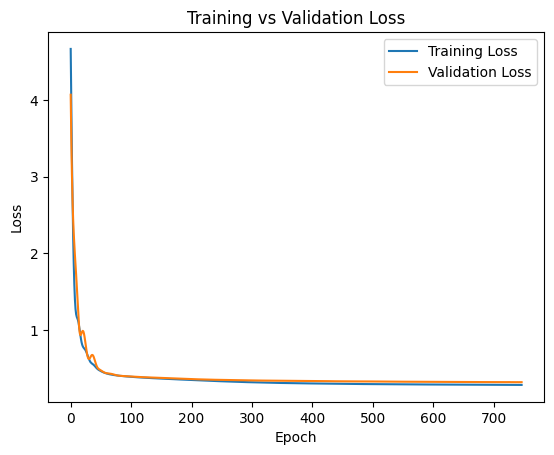

In [ ]:
import matplotlib.pyplot as plt
# Plot losses
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


In [ ]:
# Convert test data to tensors
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Forward pass for the test set
model.eval()  # Set model to evaluation mode
with torch.no_grad():  # Disable gradient computation
    predictions = model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor)
    print(f'Test Loss: {test_loss.item()}')

Test Loss: 0.3185901641845703


In [ ]:
from sklearn.metrics import r2_score
import torch

# Assuming you have the following variables after running the model on test data:
# true_values: true target values (from test set)
# predicted_values: predicted target values from your model

# Example: Convert tensors to numpy arrays for use with r2_score
true_values_np = y_test_tensor.cpu().numpy()  # Assuming your data is on GPU, transfer it to CPU
predicted_values_np = predictions.cpu().numpy()

# Calculate the R² score
r2 = r2_score(true_values_np, predicted_values_np)

print(f"R² Score: {r2:.4f}")

R² Score: 0.7569


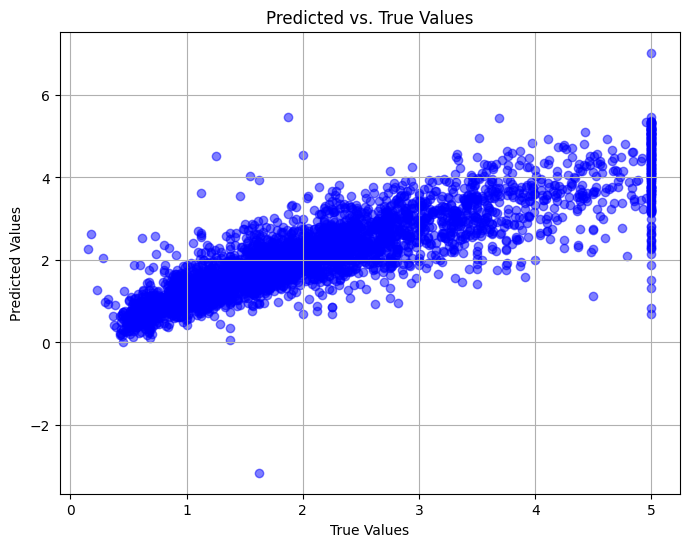

In [ ]:

import matplotlib.pyplot as plt

# Assuming you have the following variables after running the model on test data:
# true_values_np: true target values (from test set) as a NumPy array
# predicted_values_np: predicted target values from your model as a NumPy array

plt.figure(figsize=(8, 6))
plt.scatter(true_values_np, predicted_values_np, c='blue', marker='o', alpha=0.5)

plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. True Values")
plt.grid(True)
plt.show()


# Classification example
MNIST Classification Task with Neural Networks

The MNIST dataset consists of 28x28 grayscale images of handwritten digits (0 to 9).
The task is to classify each image as one of the digits.
Dataset Size:
*  60,000 training images.
*  10,000 test images.







In [ ]:
from torch.utils.data import random_split
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

# Define transforms, including normalization to range [0, 1]
transform = transforms.Compose([
    transforms.ToTensor(),  # Converts image to PyTorch tensor and scales values from [0, 255] to [0, 1]
    transforms.Normalize((0.5,), (0.5,))  # Normalize the tensor: mean 0.5, std 0.5 (maps range [0, 1] to [-1, 1])
])

# Load the MNIST dataset
full_train_data = MNIST(root='./data', train=True, download=True, transform=transform)
test_data = MNIST(root='./data', train=False, download=True, transform=transform)

# Define the lengths of the training and validation sets (e.g., 90% train, 10% validation)
train_size = int(0.9 * len(full_train_data))  # 90% for training
val_size = len(full_train_data) - train_size  # 10% for validation

# Split the dataset into training and validation sets
train_data, val_data = random_split(full_train_data, [train_size, val_size])

# Create DataLoader for batching
train_loader = DataLoader(dataset=train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(dataset=val_data, batch_size=64, shuffle=False)
test_loader = DataLoader(dataset=test_data, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 16149958.88it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 485766.91it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4516131.84it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4627284.13it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



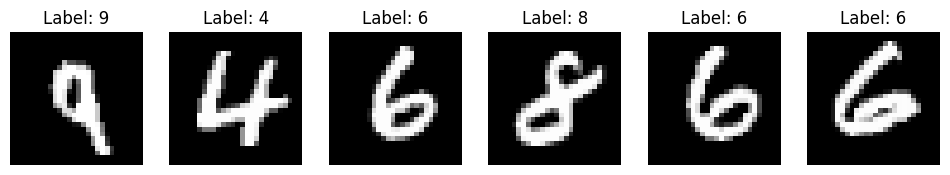

In [ ]:
# Get one batch of images and labels
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Plot the batch of images with labels
fig, axes = plt.subplots(1, 6, figsize=(12, 3))
for i in range(6):
    axes[i].imshow(images[i].squeeze(), cmap='gray')
    axes[i].set_title(f"Label: {labels[i].item()}")
    axes[i].axis('off')

plt.show()

In [ ]:
class MNISTNN(nn.Module):
    def __init__(self):
        super(MNISTNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)  # Input: 28x28 image, 128 neurons in the hidden layer
        self.fc2 = nn.Linear(128, 64)     # Second hidden layer with 64 neurons
        self.fc3 = nn.Linear(64, 10)      # Output layer: 10 classes (digits 0-9)

    def forward(self, x):
        x = x.view(-1, 28*28)            # Flatten the input image to 1D
        x = torch.relu(self.fc1(x))       # ReLU activation for hidden layers
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)                   # No activation for the output (use CrossEntropyLoss)
        return x

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
model = MNISTNN().to(device)  # Move model to GPU
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [ ]:
best_val_loss = float('inf')
patience = 5
epochs_without_improvement = 0
num_epochs = 10


for epoch in range(num_epochs):
    # Training loop
    model.train()
    for batch in train_loader:
        images, labels = batch
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Validation loop
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for val_batch in val_loader:
            val_images, val_labels = val_batch
            val_images, val_labels = val_images.to(device), val_labels.to(device)
            val_outputs = model(val_images)
            val_loss += criterion(val_outputs, val_labels).item()

    val_loss /= len(val_loader)  # Average validation loss

    # Early stopping logic
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

    if epochs_without_improvement >= patience:
        print(f'Early stopping at epoch {epoch+1}.')
        break



Epoch 1/10, Loss: 0.23576588928699493
Epoch 2/10, Loss: 0.18601447343826294
Epoch 3/10, Loss: 0.04424705728888512
Epoch 4/10, Loss: 0.06841114908456802
Epoch 5/10, Loss: 0.09444887191057205
Epoch 6/10, Loss: 0.1404186338186264
Epoch 7/10, Loss: 0.13535238802433014
Epoch 8/10, Loss: 0.05839109420776367
Epoch 9/10, Loss: 0.05946332588791847
Epoch 10/10, Loss: 0.03242111951112747


In [ ]:
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():
    for batch in test_loader:
        images, labels = batch
        images, labels = images.to(device), labels.to(device)  # Move data to GPU

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Get the predicted labels
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the model on the test set: {100 * correct / total}%')

Accuracy of the model on the test set: 97.08%


# Save the Model (Optional)
After training is done, you can save the trained model to a file for later use.

In [ ]:
torch.save(model.state_dict(), 'mnist_model.pth')  # Save the model's parameters to a file
